## Setup working directory

In [1]:
%cd ../src

e:\00_CODE\03_Master_Thesis\rdf-literal-preprocessing\src


## Load dataframe

In [29]:
import os
import numpy as np
import re
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

#df = pd. 

print('pykeen file does not exist. Writing pykeen file...')
df = pd.DataFrame(columns=["full_name","f1_macro","f1_micro"])
        
dfs = []
i = 0
for entry in os.listdir('../data/predicted/'):
    results = np.loadtxt(f'../data/predicted/{entry}', dtype=np.int32, delimiter=',')
    i+=1
    dfs.append(pd.DataFrame(
        [[
            entry,
            f1_score(results[0],results[1],average='micro'),
            f1_score(results[0],results[1],average='macro'),
        ]],
        columns=["full_name","f1_macro","f1_micro"]
    ))


df = pd.concat(dfs,ignore_index=True)
df['base_name']= df['full_name'].str.extract(r'(.*)\$[0-9]+\.csv')
df = df.groupby('base_name').mean().round(3)
df = df.reset_index()
df['dataset']= df['base_name'].str.extract(r'(.*?)\+.*')
df['eval_method']= df['base_name'].str.extract(r'.*\$([A-Z]+)')
df['steps'] = df['base_name'].str.findall(r'\+(.*?)-')
df['steps'] = [', '.join(map(str, l)) for l in df['steps']]
df['embedder'] = df['base_name'].str.extract(r'\$(.*?)\$')
df = df.drop(columns='base_name')


pykeen file does not exist. Writing pykeen file...


C:\Users\Noctris\AppData\Local\Temp\ipykernel_7092\1908857062.py:29: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df.groupby('base_name').mean().round(3)


## Inspect H1

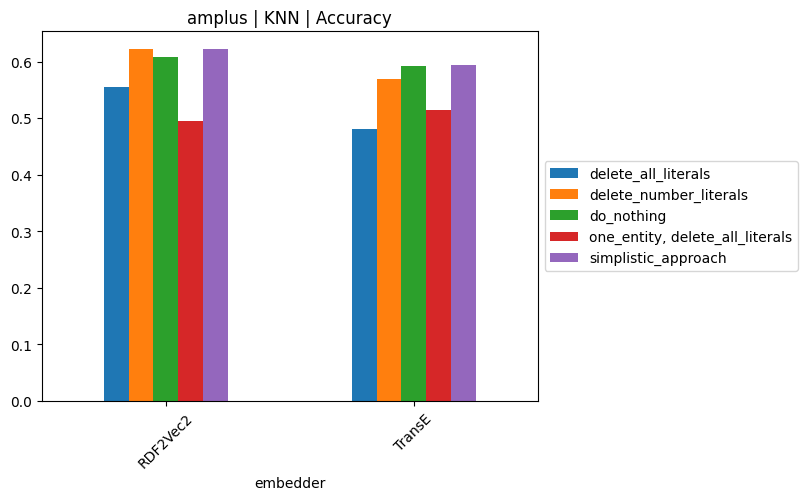

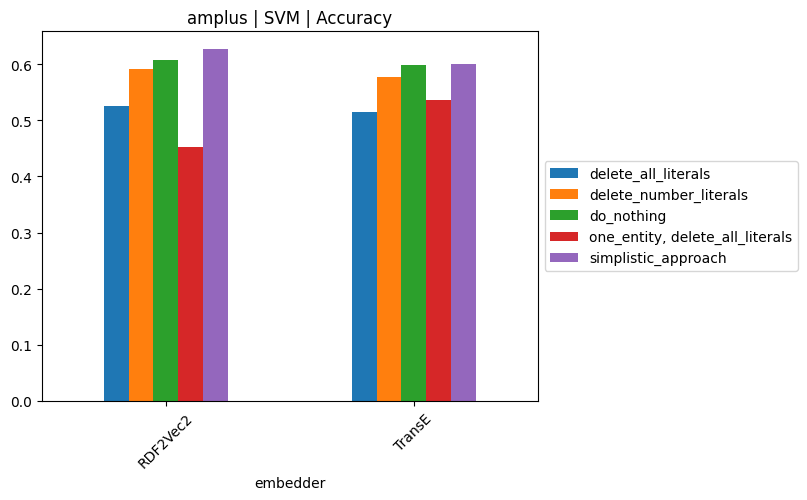

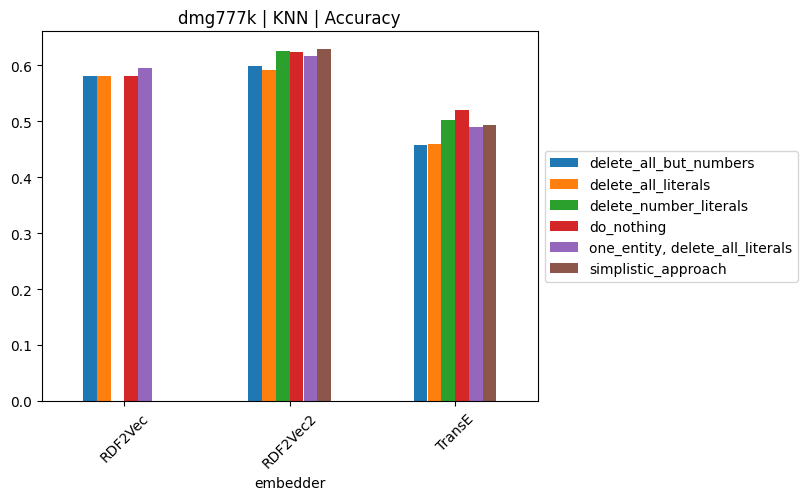

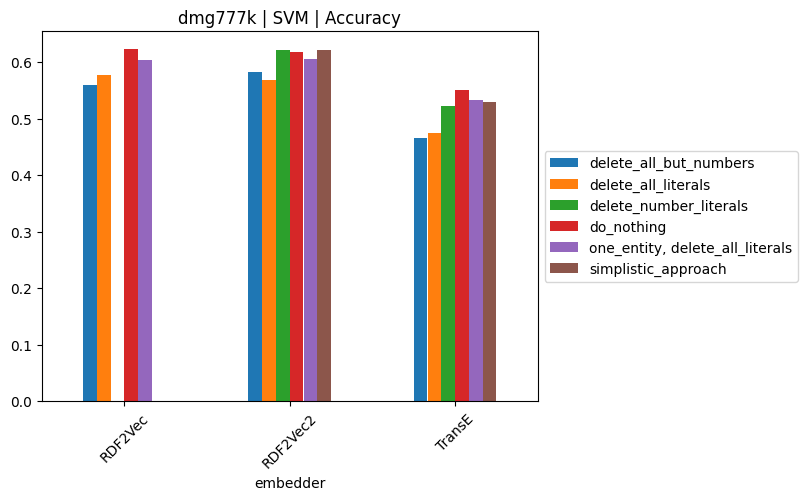

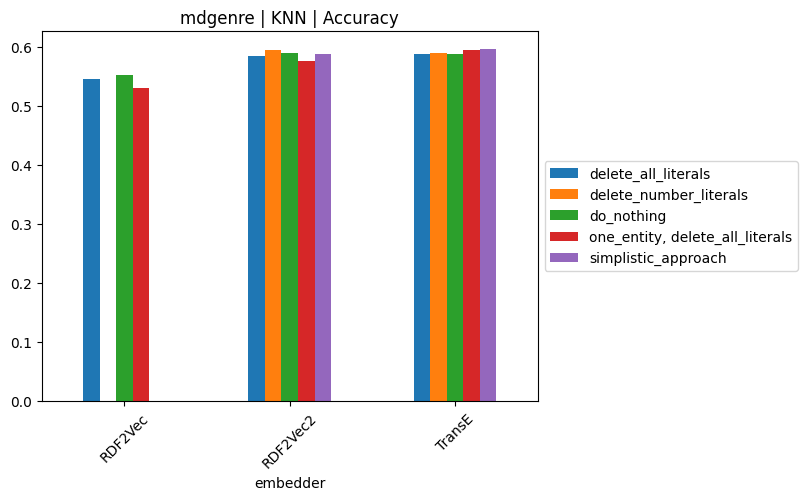

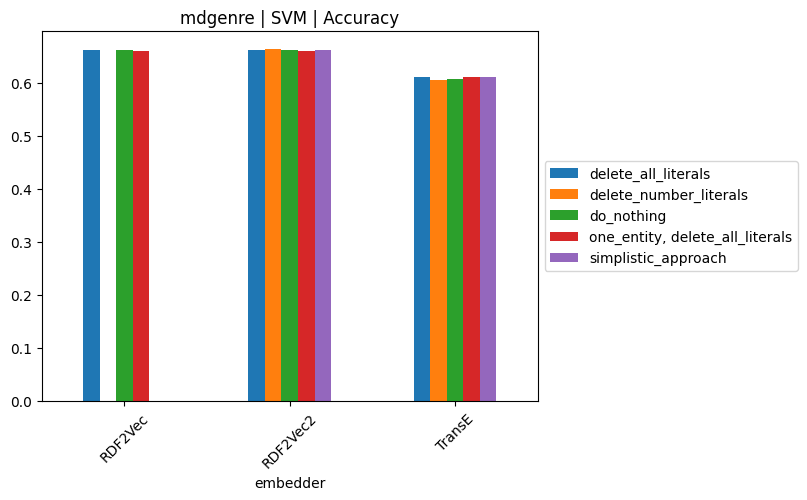

In [8]:
for dataset in df['dataset'].unique():
    for evaluation in df['eval_method'].unique():
        if len(df[(df['dataset']==dataset) & (df['eval_method'] == evaluation) & (df['steps'].str.match(r'(one|delete|do_nothing|simplistic).*'))]) != 0:
            pd.pivot_table(df[(df['dataset']==dataset) & (df['eval_method'] == evaluation) & (df['steps'].str.match(r'(one|delete|do_nothing|simplistic).*'))],
               index='embedder', columns=['steps'],values='f1_macro'
              ).plot(subplots=False, rot= 45, kind='bar', title=f'{dataset} | {evaluation} | Accuracy').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

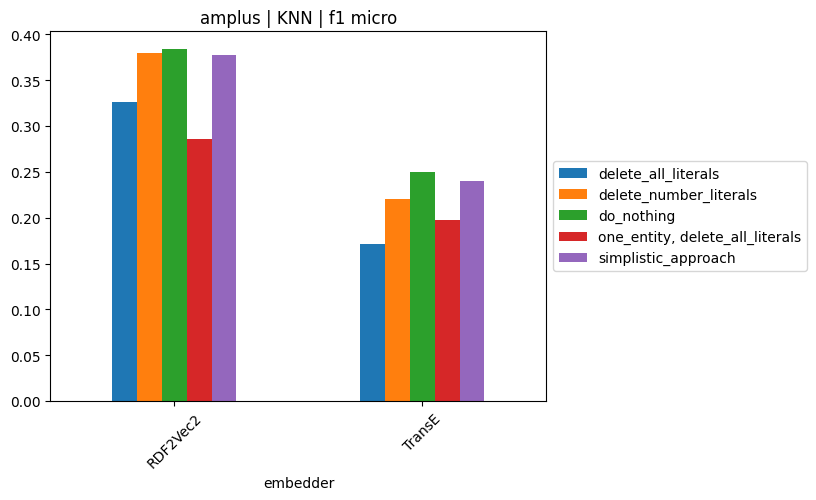

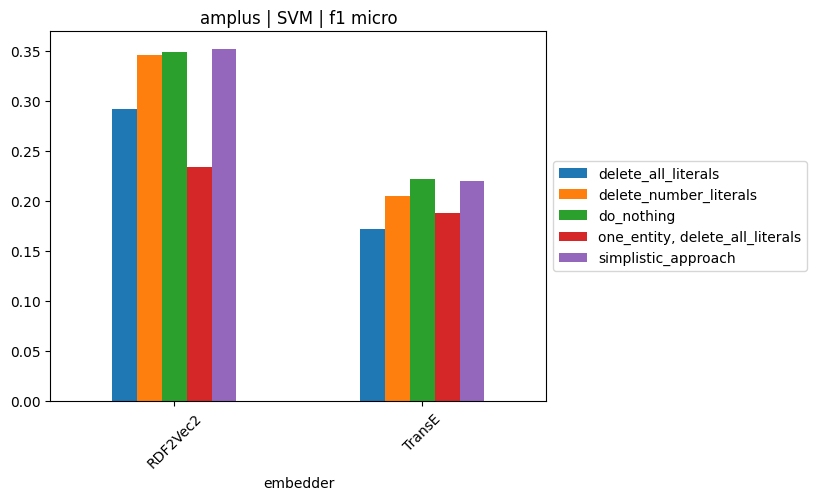

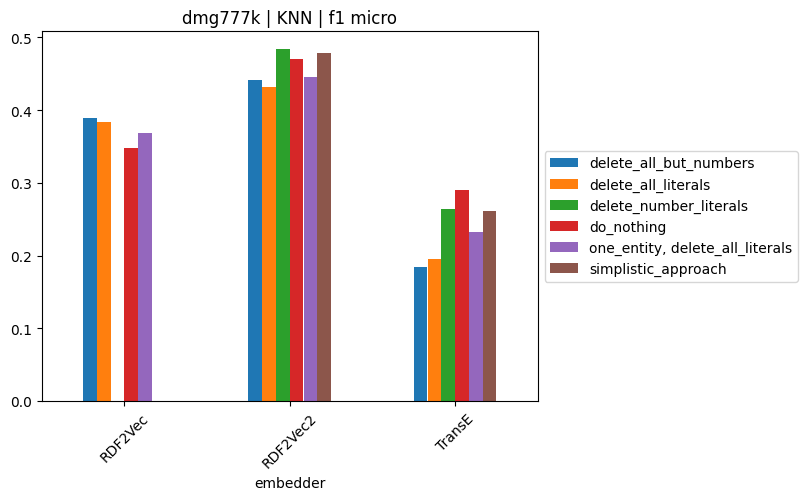

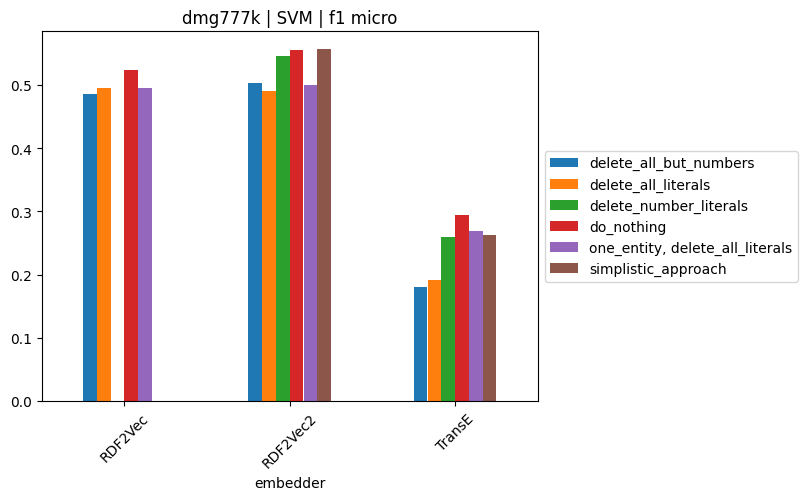

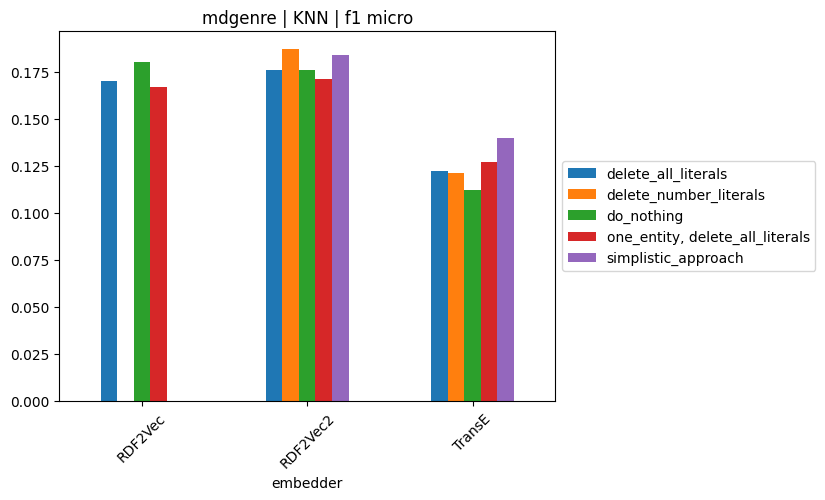

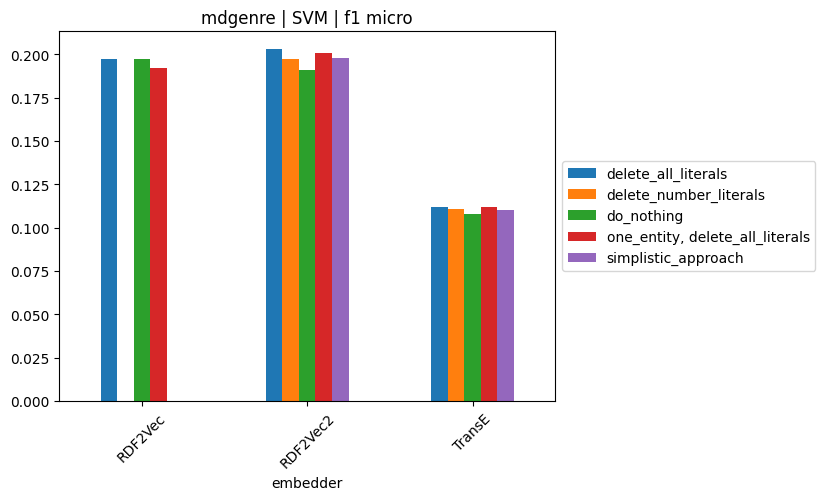

In [9]:
for dataset in df['dataset'].unique():
    for evaluation in df['eval_method'].unique():
        if len(df[(df['dataset']==dataset) & (df['eval_method'] == evaluation) & (df['steps'].str.match(r'(one|delete|do_nothing|simplistic).*'))]) != 0:
            pd.pivot_table(df[(df['dataset']==dataset) & (df['eval_method'] == evaluation) & (df['steps'].str.match(r'(one|delete|do_nothing|simplistic).*'))],
               index='embedder', columns=['steps'],values='f1_micro'
              ).plot(subplots=False, rot= 45, kind='bar', title=f'{dataset} | {evaluation} | f1 micro').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

## Inspect Binning

In [ ]:
df[(df['dataset']=='amplus') ].f1_macro

In [18]:
for dataset in df['dataset'].unique():
    df[(df['dataset']=='amplus') &(df['embedder'] != 'RDF2Vec2') ]

In [28]:
df[(df['dataset']=='amplus')&(df['embedder'] != 'RDF2Vec2') ].sort_values(by=['f1_macro'],ascending=False).head(10)

,f1_macro,f1_micro,dataset,eval_method,steps,embedder
7,0.609,0.230,amplus,SVM,bin_numbers_10,TransE
6,0.605,0.264,amplus,KNN,bin_numbers_10,TransE
79,0.601,0.220,amplus,SVM,simplistic_approach,TransE
71,0.598,0.222,amplus,SVM,do_nothing,TransE
22,0.596,0.279,amplus,KNN,"bin_numbers_hierarchically_3_10_100, delete_nu...",TransE
23,0.595,0.223,amplus,SVM,"bin_numbers_hierarchically_3_10_100, delete_nu...",TransE
78,0.594,0.240,amplus,KNN,simplistic_approach,TransE
70,0.592,0.250,amplus,KNN,do_nothing,TransE
11,0.589,0.217,amplus,SVM,"bin_numbers_10, delete_number_literals",TransE
55,0.587,0.216,amplus,SVM,"bin_numbers_percentage_5, delete_number_literals",TransE


In [17]:
df.head(10)

,f1_macro,f1_micro,dataset,eval_method,steps,embedder
0,0.622,0.387,amplus,KNN,"bin_numbers2, delete_number_literals",RDF2Vec2
1,0.610,0.369,amplus,SVM,"bin_numbers2, delete_number_literals",RDF2Vec2
2,0.572,0.221,amplus,KNN,"bin_numbers2, delete_number_literals",TransE
3,0.582,0.208,amplus,SVM,"bin_numbers2, delete_number_literals",TransE
4,0.564,0.302,amplus,KNN,bin_numbers_10,RDF2Vec2
5,0.602,0.297,amplus,SVM,bin_numbers_10,RDF2Vec2
6,0.605,0.264,amplus,KNN,bin_numbers_10,TransE
7,0.609,0.230,amplus,SVM,bin_numbers_10,TransE
8,0.556,0.311,amplus,KNN,"bin_numbers_10, delete_number_literals",RDF2Vec2
9,0.541,0.299,amplus,SVM,"bin_numbers_10, delete_number_literals",RDF2Vec2


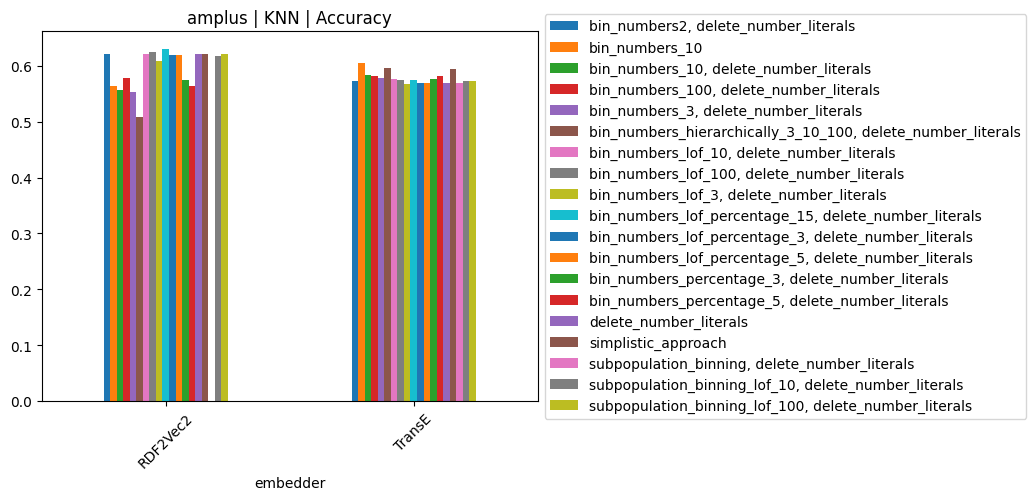

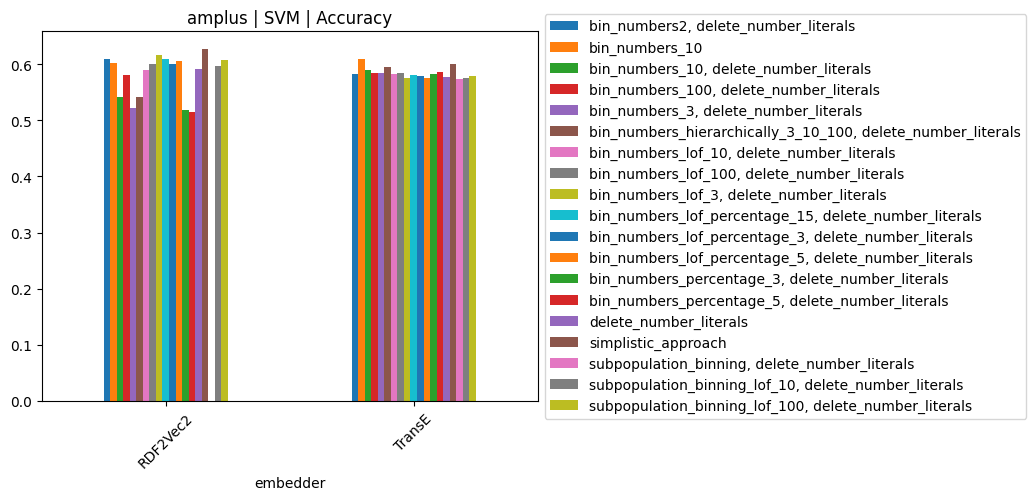

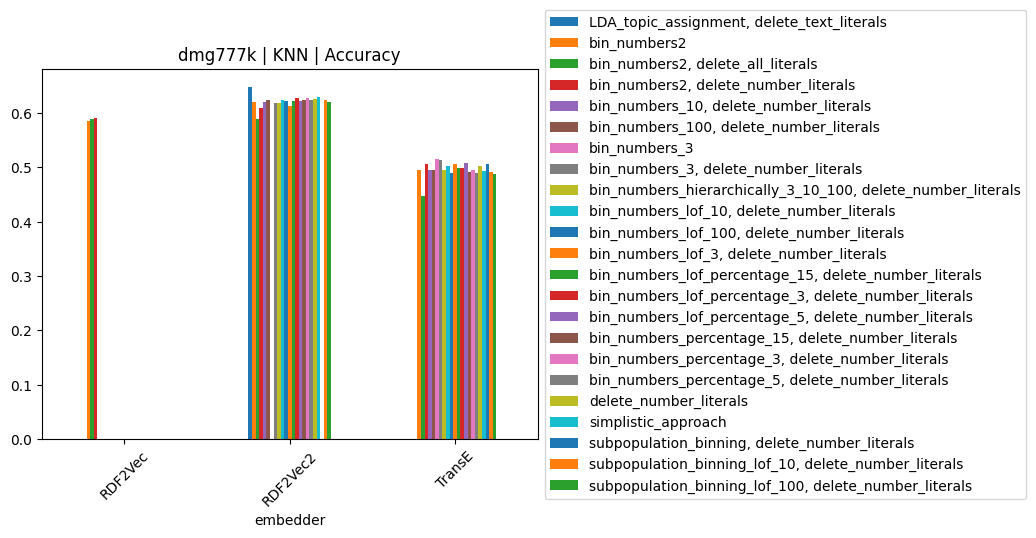

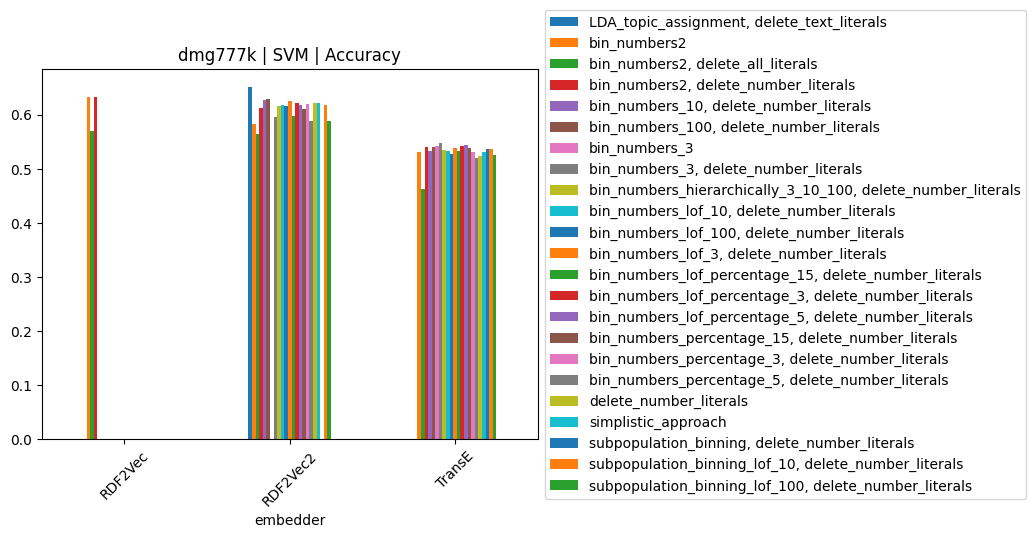

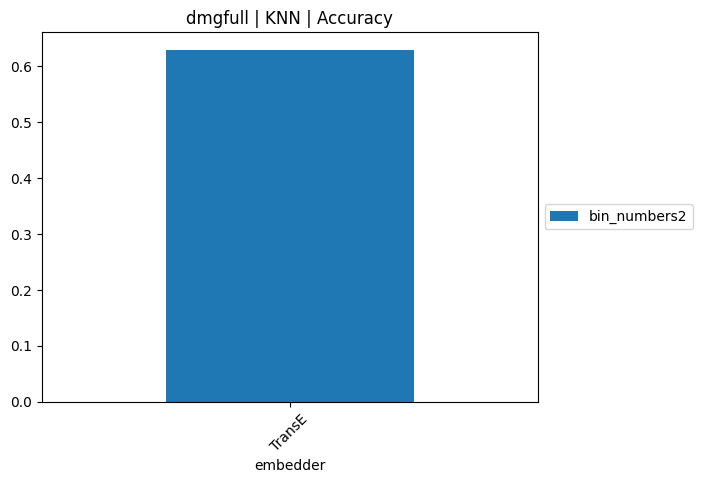

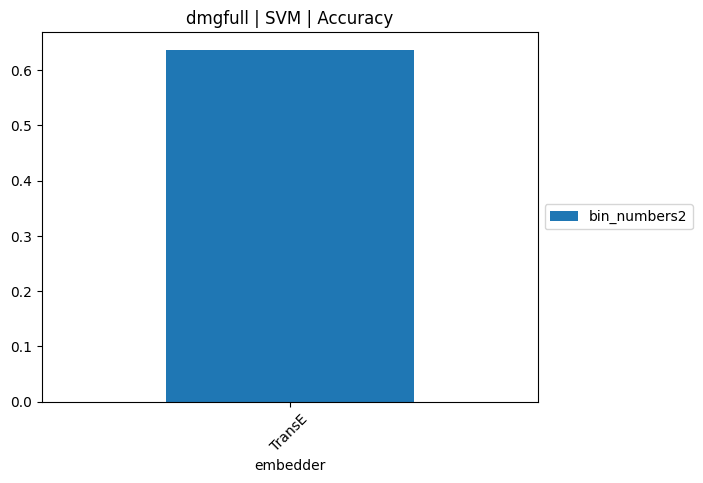

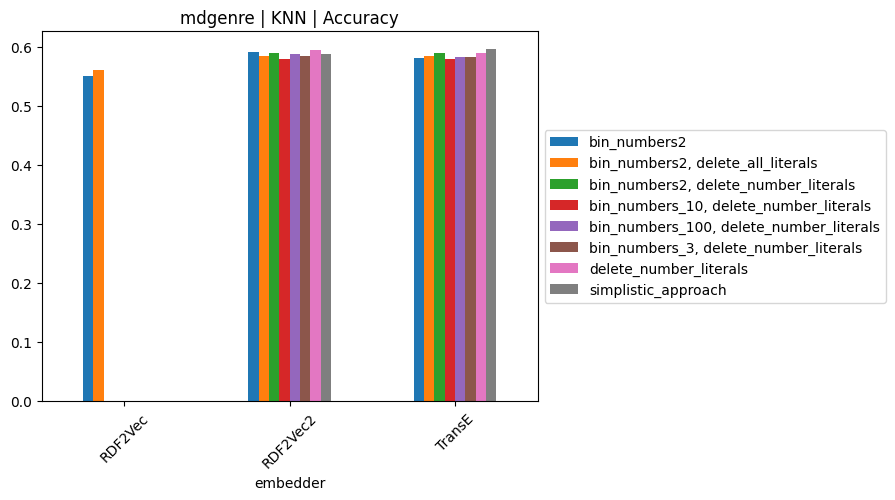

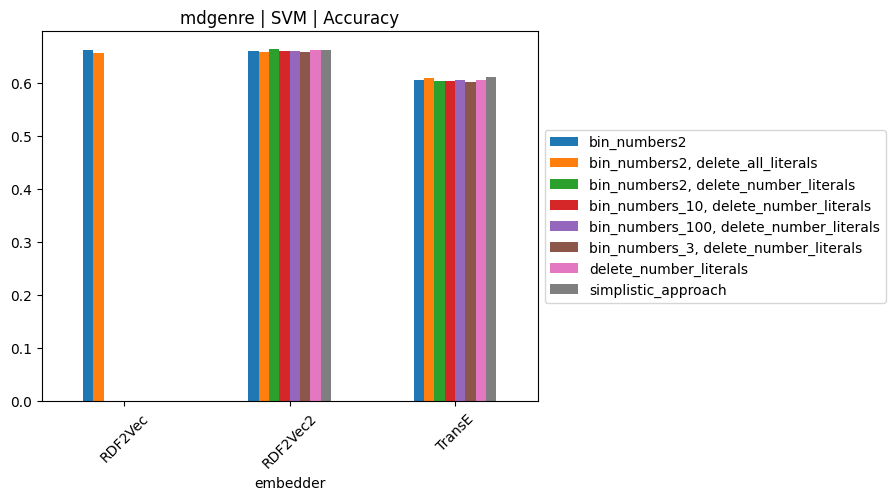

In [32]:
for dataset in df['dataset'].unique():
    for evaluation in df['eval_method'].unique():
        if len(df[(df['dataset']==dataset) & (df['eval_method'] == evaluation) & (df['steps'].str.match(r'(bin_numbers|delete_number|simplistic|sub|LDA).*'))]) != 0:
            pd.pivot_table(df[(df['dataset']==dataset) & (df['eval_method'] == evaluation) & (df['steps'].str.match(r'(bin_numbers|delete_number|simplistic|sub|LDA).*'))],
               index='embedder', columns=['steps'],values='f1_macro'
              ).plot(subplots=False, rot= 45, kind='bar', title=f'{dataset} | {evaluation} | Accuracy').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

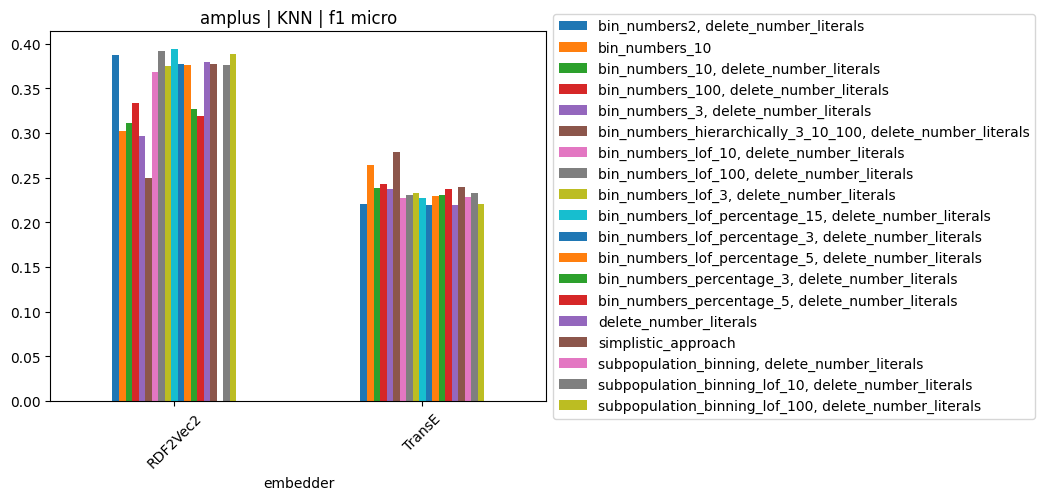

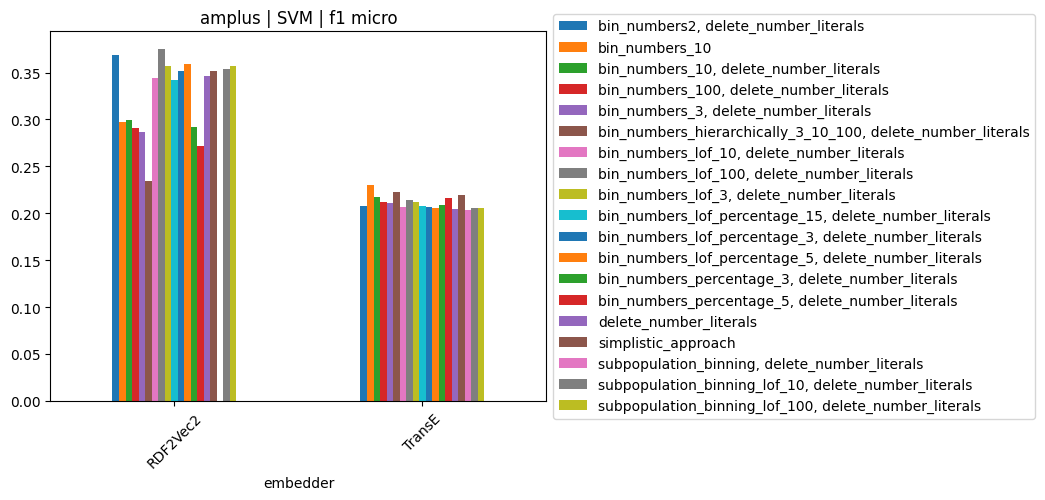

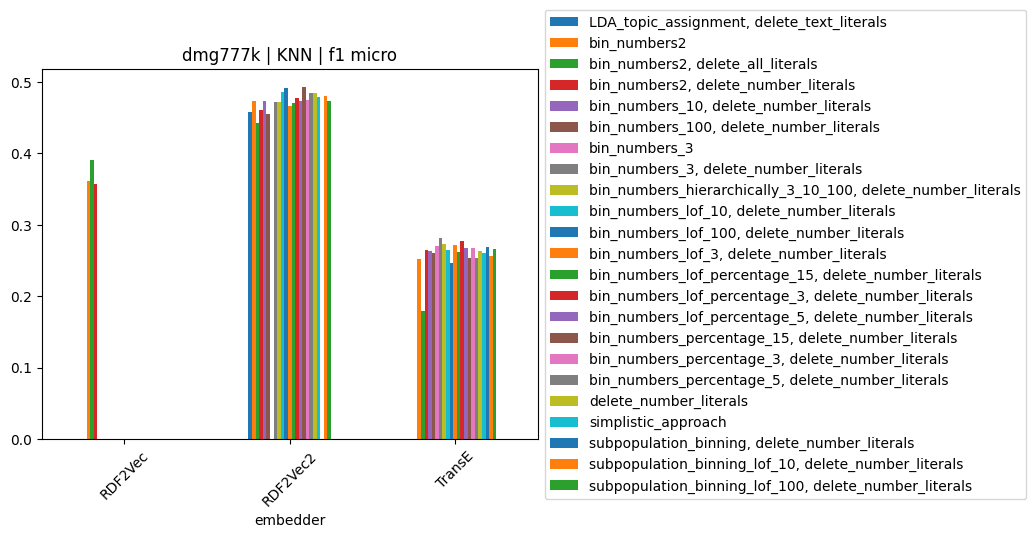

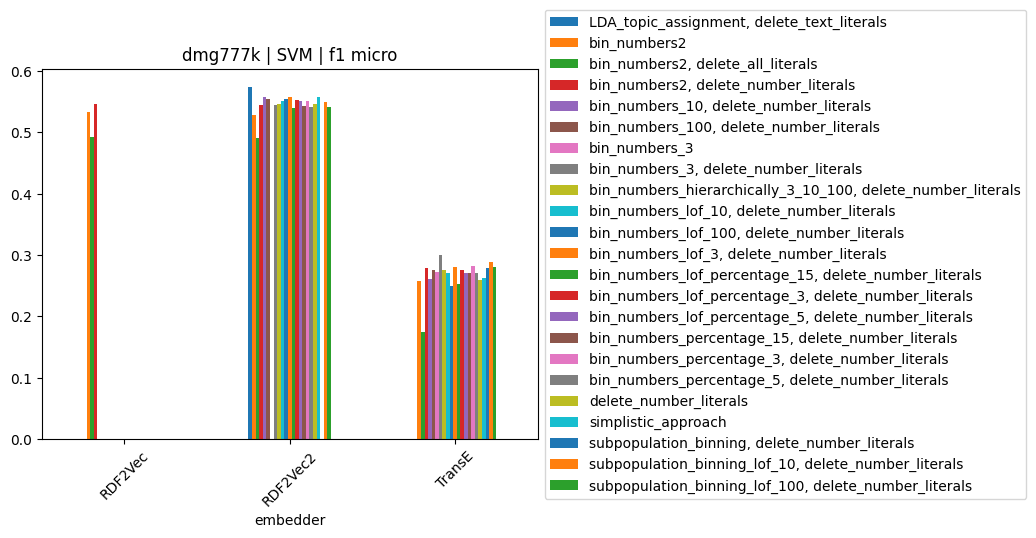

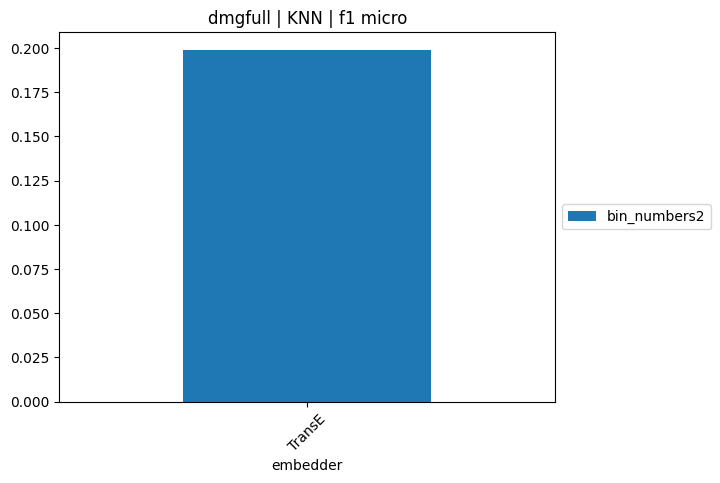

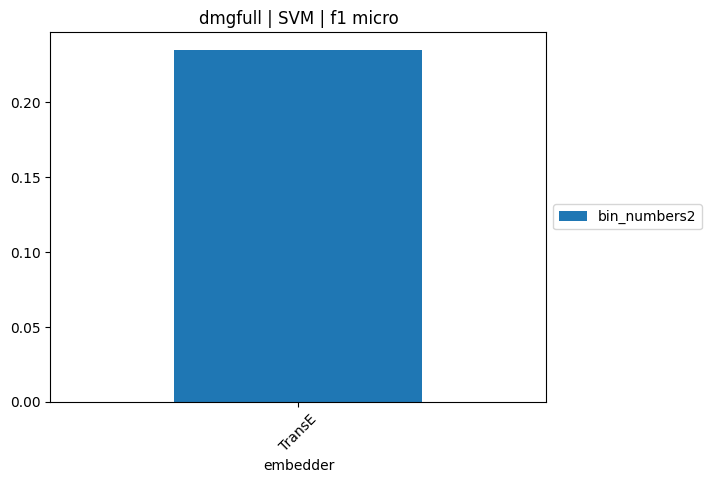

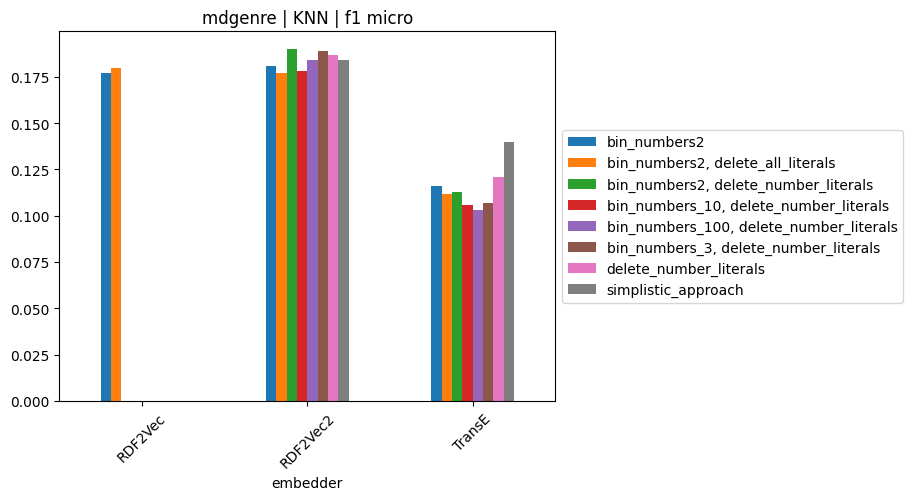

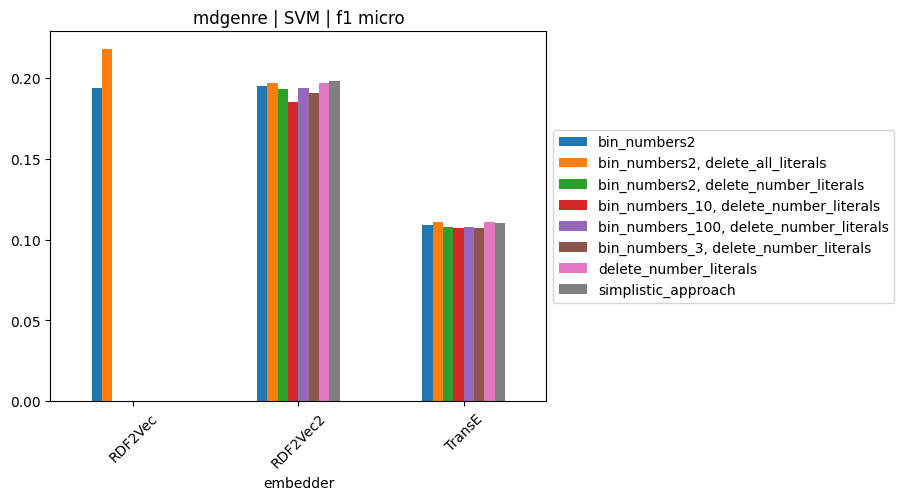

In [31]:
for dataset in df['dataset'].unique():
    for evaluation in df['eval_method'].unique():
        if len(df[(df['dataset']==dataset) & (df['eval_method'] == evaluation) & (df['steps'].str.match(r'(bin_numbers|delete_number|simplistic|sub|LDA).*'))]) != 0:
            pd.pivot_table(df[(df['dataset']==dataset) & (df['eval_method'] == evaluation) & (df['steps'].str.match(r'(bin_numbers|delete_number|simplistic|sub|LDA).*'))],
               index='embedder', columns=['steps'],values='f1_micro'
              ).plot(subplots=False, rot= 45, kind='bar', title=f'{dataset} | {evaluation} | f1 micro').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))